# Questão 3
Implemente o algoritmo K-means e considere o dados apresentados na tabela abaixo para serem usando no processo de clustering.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
cores = {0:'red', 1:'green', 2:'blue'}
marcador = {0:'o', 1:'^', 2:'x'}

x1 = [-7.82,-6.68,4.36,6.72,-8.64,-6.87,4.47,6.73,-7.71,-6.91,6.18,6.72,-6.25,-6.94,8.09,6.81,-5.19,-6.38,4.08,6.27]
x2 = [-4.58,3.16,-2.19,0.88,3.06,0.57,-2.62,-2.01,2.34,-0.49,2.81,-0.93,-0.26,-1.22,0.20,0.17,4.24,-1.74,1.30,0.93]
x3 = [-3.97,2.71,2.09,2.80,3.50,-5.45,5.76,4.18,-6.33,-5.68,5.82,-4.04,0.56,1.13,2.25,-4.15,4.04,1.43,5.33,-2.78]
dados = []
for i,j,k in zip(x1,x2,x3):
    dados.append([i,j,k])
    
dados = np.array(dados)
print('Amostras:\n'+str(dados))

Amostras:
[[-7.82 -4.58 -3.97]
 [-6.68  3.16  2.71]
 [ 4.36 -2.19  2.09]
 [ 6.72  0.88  2.8 ]
 [-8.64  3.06  3.5 ]
 [-6.87  0.57 -5.45]
 [ 4.47 -2.62  5.76]
 [ 6.73 -2.01  4.18]
 [-7.71  2.34 -6.33]
 [-6.91 -0.49 -5.68]
 [ 6.18  2.81  5.82]
 [ 6.72 -0.93 -4.04]
 [-6.25 -0.26  0.56]
 [-6.94 -1.22  1.13]
 [ 8.09  0.2   2.25]
 [ 6.81  0.17 -4.15]
 [-5.19  4.24  4.04]
 [-6.38 -1.74  1.43]
 [ 4.08  1.3   5.33]
 [ 6.27  0.93 -2.78]]


![Pontos](img/q3-pontos.gif)
Intuitivamente um humano pode interpretar esse gráfico como dois grupos de pontos bem separados pelo plano $yz$. Nesta questão forçaremos o algoritmo K-Means a separá-los em 3 grupos de forma que eles fiquem o mais disjunto possível. Porém, a qualidade do resultado depende de uma boa escolha dos centróides iniciais.

Texto de [Introdução básica à Clusterização](https://lamfo-unb.github.io/2017/10/05/Introducao_basica_a_clusterizacao/):

"E como podemos ter uma noção da qualidade dos nossos clusters encontrados? A forma mais simples de verificarmos é medindo os valores inter-clusters e intra-clusters.

A distância **inter-clusters** (entre clusters) nos diz o quão distantes estão os clusters dos outros, ou seja, em geral é um bom sinal quando eles estão distantes entre si pois mostram maior isolamento dos grupos e provavelmente uma classificação mais precisa.

A distância **intra-cluster** (interna aos clusters) nos diz o quão distantes estão os elementos de um grupo ao seu centróide. Em geral grupos mais densos (com elementos mais próximos) têm maior similaridade e tem mais chance de realmente compartilharem a mesma classificação."


## Funções criadas

Suas descrições estão dentro da implementação.

In [2]:
def dist(a,b):
    '''Calcula distância entre pontoA e pontoB.'''
    a=np.array(a); b=np.array(b)
    return np.sqrt(np.dot(a-b,a-b))

def centro(pontos):
    '''Calcula centróide de um conjunto de pontos. Neste contexto, conjunto de pontos = cluster.'''
    if len(pontos)==0:
        return []
    centroide = []
    pontos=np.array(pontos)
    for i in range(len(pontos[0])):
        soma = 0
        for j in range(len(pontos)):
            soma += pontos[j][i]
        centroide.append(soma/len(pontos)) 
    return np.array(centroide)


def MSE(a,b):
    '''Calcula erro médio quadrático em uma lista de amostras. Primeiro são 
    calculados as médias quadráticas elemento a elemento de a e b. As 
    várias médias são associadas em um único valor, que é retornado.'''
    a=np.array(a); b=np.array(b)
    soma = 0
    for i,j in zip(a,b):
        soma += np.array(((i-j)**2).mean())
    return soma/len(a)

def predict(amostras, centroides):
    '''Recebe uma lista de amostras e a lista com os centróides. Faz a 
    associação de cada amostra com um dos centróides.'''
    rotulos = []
    for a in amostras:
        menorDist = dist(a, centroides[0])  # menor distância da amostra 'a' à um centróide
        ind = 0  # Índice do centróide com menor distância
        for i in range(1,len(centroides)): # Começa do segundo
            d = dist(a, centroides[i])
            if d < menorDist:
                menorDist = d
                ind = i
        rotulos.append(ind)
    return rotulos

def kMeans(dados, erro=1e-1, centroides=0):
    '''Esta função implementa o algoritmo k-means até que os centróides. 
    A segunda condição de parada é os centróides pararem de variar.'''
    if centroides==0:
        print('Erro: Não foram passados centróides iniciais')
        return centroides
    
    dados = np.array(dados)  # só pra garantir
    centroides = np.array(centroides)
    clusters = []
    for i in centroides:
        clusters.append([])
    varia=[]  # histórico do erro médio quadrático
    while True:
        # CLASSIFICANDO PONTOS
        for d in dados:
            distancias = []  # lista com distâncias do dado 'd' aos centroides
            for c in centroides:
                distancias.append(dist(d,c))  # len(centroides) = len(distancias)
            clusters[np.argmin(distancias)].append(d)  # guarda 'd' em uma das listas em 'clusters' com base na menor distância calculada
        
        # ATUALIZANDO CENTRÓIDES
        novo_centro = []  # lista com novos centróides
        for classe,centroide_ant in zip(clusters,centroides):
            if len(classe)>0:  # # houver pontos na classe
                novo_centro.append(centro(classe))  # calcula o centro de cada classe
            else:
                #print('classe is [], mantendo centro anterior...'+str(centroide_ant))
                novo_centro.append(centroide_ant)  # centroide fica no mesmo lugar
                
        #CENTROS: COMPARANDO NOVO COM ANTEIOR
        varia.append(MSE(novo_centro, centroides))
        if varia[-1]<erro: # Limiar de aceitação da variação
            break  # Sai do WHILE maior
        else:
            centroides = novo_centro.copy()  # Atualiza valores de 'centroides'
    return centroides, varia


 Como a função recebe os centróides iniciais, já está implicito o K que será usado.

## Primeiro caso
Centróides iniciais são $(0,0,0)$, $(1,1,1)$ e $(-1,0,2)$.

![Centros1](img/q3-centros1.gif)

A partir da segunda iteração é calculada o erro médio quadrático entre cada centróide e sua versão anterior pela  fórmula abaixo: $$MSE = \displaystyle\frac{1}{N}\sum_{i=1}^{N}(x_{i,atual}-x_{i,anterior})^{2} $$
Como neste problema temos 3 centróides, há 3 variações a serem calculadas. Em seguinda, calculamos a média desses valores e verificamos se ela é maior que o valor passado no 2º argumento da função. O método `kmeans()` acima pára a execução quando a variação está abaixo do limiar.

Iterações necessárias=2
centroides calculados: 
[[-7.33 -0.54 -5.36]
 [ 6.04 -0.15  1.73]
 [-6.68  1.21  2.23]]


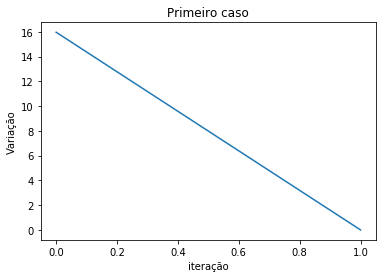

In [8]:
centroides = [[0, 0, 0],[1, 1, 1],[-1, 0, 2]]
result1,erro1 = kMeans(dados, 1e-3, centroides)
print('Iterações necessárias='+str(len(erro1)))
print('centroides calculados: \n'+str(np.round(result1,2)))
plt.plot(erro1)
plt.title('Primeiro caso')
plt.xlabel('iteração')
plt.ylabel('Variação')
plt.show()

Plotando 

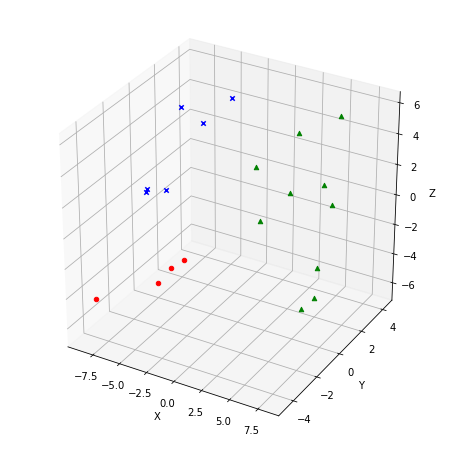

In [9]:
rot1 = predict(dados, result1)
fig1 = plt.figure(figsize=(6,6))
ax1 = Axes3D(fig1)
for i in range(len(dados)):
    xs = dados[i][0]    
    ys = dados[i][1]
    zs = dados[i][2]
    ax1.scatter(xs,ys,zs, c=cores[rot1[i]], marker=marcador[rot1[i]])

ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
plt.show()

Reproduzindo o gráfico acima no geogebra, temos:
![Grafico1](img/q3-caso1-result.gif)

## Segundo caso
Centróides iniciais são $(-0.1,0,0.1)$, $(0,-0.1,0.1)$ e $(-0.1,-0.1,0.1)$.

![Caso2](img/caso2.png)


Iterações necessárias=10
centroides calculados: 
[[-6.9   3.31  2.47]
 [ 6.04 -0.15  1.73]
 [-6.96 -0.89 -2.44]]


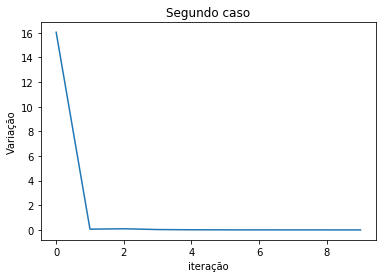

In [10]:
centroides = [[-0.1, 0, 0.1],[0, -0.1, 0.1],[-0.1, -0.1, 0.1]]
result2,erro2 = kMeans(dados, 1e-3, centroides)
print('Iterações necessárias='+str(len(erro2)))
print('centroides calculados: \n'+str(np.round(result2,2)))
plt.plot(erro2)
plt.title('Segundo caso')
plt.xlabel('iteração')
plt.ylabel('Variação')
plt.show()

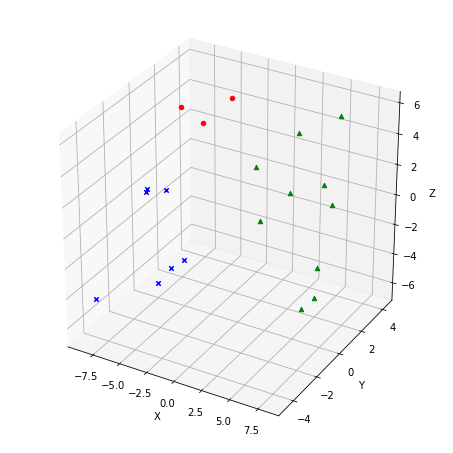

In [6]:
rot2 = predict(dados, result2)
fig2 = plt.figure(figsize=(6,6))
ax2 = Axes3D(fig2)
for i in range(len(dados)):
    xs = dados[i][0]    
    ys = dados[i][1]
    zs = dados[i][2]
    ax2.scatter(xs,ys,zs, c=cores[rot2[i]], marker=marcador[rot2[i]])
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
plt.show()

O resultado no geogebra:

![caso2](img/q3-caso2-result.gif)

Notamos que em ambos os casos os clusters não convergiram para o mesmo lugar, com excecção do agrupamento verde. No primeiro caso, a convergência é mais rápida.

# Bônus
Resolvendo com o kmeans do `sklearn.cluster`.

centros=
[[ 6.043      -0.146       1.726     ]
 [-7.3275     -0.54       -5.3575    ]
 [-6.68        1.20666667  2.22833333]]


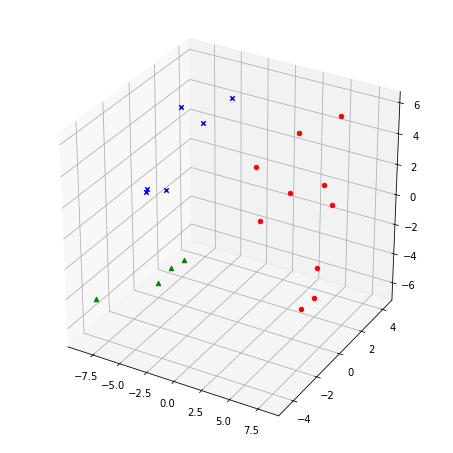

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(dados)
print('centros=\n'+str(kmeans.cluster_centers_))
#print('labels=\n'+str(kmeans.labels_))

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
for i in range(len(dados)):
    xs = dados[i][0]    
    ys = dados[i][1]
    zs = dados[i][2]
    ax.scatter(xs,ys,zs, c=cores[kmeans.labels_[i]], marker=marcador[kmeans.labels_[i]])
plt.show()